In [2]:
# Imports, always run this cell
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import random as rnd

from functools import cmp_to_key

import sklearn.datasets as skdataset
from sklearn.decomposition import PCA

import pandas as pd

In [3]:
# AUXILIARY PLOTTING FUNCTIONS

# Global plot style
plt.style.use('bmh')

def plotPoints(points, color='b', marker='o', scaleEqual=True, label=None):
    '''
    Plot points

    Note
    ----
    points is a list of np.array and each array MUST have shape (2,)
    '''

    # Adjust scale
    if scaleEqual: plt.axis('equal')

    xP = [p[0] for p in points]
    yP = [p[1] for p in points]

    if label == None: plt.scatter(x=xP, y=yP, color=color, marker=marker)
    else:             plt.scatter(x=xP, y=yP, color=color, marker=marker, label=label), plt.legend(loc='upper left')

def plotSegments(segments, color='b', marker='o', linestyle='-', scaleEqual=True):
    '''
    Plot line segments

    Note
    ----
    segments is a list of np.array and each array MUST have shape (2, 2)
    '''

    # Adjust scale
    if scaleEqual: plt.axis('equal')

    for s in segments:
        xVal = [s[0][0], s[1][0]]
        yVal = [s[0][1], s[1][1]]

        plt.plot(xVal, yVal , color=color, marker=marker, linestyle=linestyle)

def plotConvexHull(allPoints, allSegments, color='b', marker='o', linestyle='-', scaleEqual=True, label=None):
    '''
    Plot convex hull, including
    inner points and convex polygon segments

    Note
    ----
    allPoints is a list of np.array and each array MUST have shape (2,)

    allSegments is a list of np.array and each array MUST have shape (2, 2)
    '''

    # Plot both points and segments
    plotPoints(allPoints, color, marker, scaleEqual=scaleEqual, label=label)
    plotSegments(allSegments, color, marker, linestyle, scaleEqual=scaleEqual)

    plt.ylabel("Y axis")
    plt.xlabel("X axis")

def plotLineFromEquation(slope, intercept, xp, yp, color='blue', scaleEqual=True):
    '''
    Plot line given equation and a point.
    Also draw y = ax + b around a point

    Parameters
    ----------
    slope: slope of the line
    intercept: y-intercept of the line
    xp, yp: coordinates of any point from given equation

    Note
    ----
    Slope cannot be zero
    '''

    # Adjust scale
    if scaleEqual: plt.axis('equal')

    plotPoints([np.array([xp, yp])], color=color) 

    text = f"y = {slope:.3f}x {intercept:.3f}"

    plt.axline([xp, yp], slope=slope, color=color, label=text)
    plt.legend(loc='upper left')

    plt.ylabel("Y axis")
    plt.xlabel("X axis")
    

In [4]:
# AUXILIARY DATA STRUCTURES AND FUNCTIONS

# ======================================================= #
class Stack:
    def __init__(self):
        self.size = 0
        self.stack = []

    def push(self, obj):
        self.stack.append(obj)
        self.size += 1

    def pop(self):
        self.stack.pop()
        self.size -= 1

    def top(self):
        return self.stack[-1]

    def toList(self):
        return self.stack
    
    def len(self):
        return self.size
    
    def isEmpty(self):
        return self.size == 0

# ======================================================= #
def selectionSort(array, cmp, start, end):
    '''
    Sort an array in-place.

    Parameters
    ----------
    array: array to sort
    cmp: compare function
    start, end: start and end indexes, both inclusive

    Returns
    -------
    Sorted array
    '''

    for i in range(start, end):
        min = i
        
        for j in range(i + 1, end + 1):  
            if cmp(array[j], array[min]) == -1:
                min = j

        # Avoid swapping same element
        if min != i:
            array[i], array[min] = array[min], array[i]

    return array

# Threshold for using selection sort instead of quick sort
QS_THRESHOLD = 100

def quickSort(array, cmp, start, end):
    '''
    Sort an array in-place. Iterative implementation.
    Uses Selection Sort below a threshold for efficiency.

    Parameters
    ----------
    array: array to sort
    cmp: compare function
    start, end: start and end indexes, both inclusive

    Returns
    -------
    Sorted array
    '''

    # Iterative quicksort
    stack = Stack()
    stack.push((start, end))

    while stack.isEmpty() == False:
        # Get current partition
        (pStart, pEnd) = stack.top()
        stack.pop()

        # Use selection sort when below threshold
        if pEnd - pStart < QS_THRESHOLD:
            selectionSort(array, cmp, pStart, pEnd)
            continue
        
        i, j = pStart, pEnd
        pivot = cp.deepcopy(array[rnd.randint(pStart, pEnd)])

        # Main loop
        while i <= j:
            while cmp(pivot, array[i]) == 1:
                i += 1

            while cmp(pivot, array[j]) == -1:
                j -= 1

            # Swap [i] and [j]
            if i <= j:
                if i != j:
                    array[i], array[j] = array[j], array[i]

                i += 1
                j -= 1
        
        # Left partition
        if pStart < j:
            stack.push((pStart, j))

        # Right partition
        if i < pEnd:
            stack.push((i, pEnd))

    # Sorting happened in-place, but return anyways
    return array

# ======================================================= #
# BINARY TREE IMPLEMENTATION, SOURCE: 
# https://www.geeksforgeeks.org/deletion-in-binary-search-tree/

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BST:
    def __init__(self, cmp):
        self.cmp = cmp
        self.root = None

    def inOrder(self):
        inOrderAUX(self.root)

    def insert(self, key):
        self.root = insertAUX(self.root, key, self.cmp)
    
    def delete(self, key):
        self.root = deleteAUX(self.root, key, self.cmp)

    def getBelowAbove(self, key):
        findPreSucAUX.pre = None
        findPreSucAUX.suc = None

        findPreSucAUX(self.root, key, self.cmp)

        below = findPreSucAUX.pre
        above = findPreSucAUX.suc

        return below, above
        
# A utility function to do inorder traversal of BST
def inOrderAUX(root):
    if root is not None:
        inOrderAUX(root.left)
        print(root.key, end=' ')
        inOrderAUX(root.right)
 
# A utility function to insert a new node with given key in BST
def insertAUX(node, key, cmp):
    # If the tree is empty, return a new node
    if node is None:
        return Node(key)
 
    # Otherwise, recur down the tree
    if cmp(key, node.key) < 0:
        node.left = insertAUX(node.left, key, cmp)
    else:
        node.right = insertAUX(node.right, key, cmp)
 
    # return the (unchanged) node pointer
    return node
 
# Given a binary search tree and a key, this function
# deletes the key and returns the new root
def deleteAUX(root, key, cmp):
    # Base case
    if root is None:
        return root
 
    # Recursive calls for ancestors of
    # node to be deleted
    if cmp(root.key, key) > 0:
        root.left = deleteAUX(root.left, key, cmp)
        return root
    elif cmp(root.key, key) < 0:
        root.right = deleteAUX(root.right, key, cmp)
        return root
 
    # We reach here when root is the node
    # to be deleted.
 
    # If one of the children is empty
    if root.left is None:
        temp = root.right
        del root
        return temp
    elif root.right is None:
        temp = root.left
        del root
        return temp
 
    # If both children exist
    else:
        succParent = root
 
        # Find successor
        succ = root.right
        while succ.left is not None:
            succParent = succ
            succ = succ.left
 
        # Delete successor.  Since successor
        # is always left child of its parent
        # we can safely make successor's right
        # right child as left of its parent.
        # If there is no succ, then assign
        # succ.right to succParent.right
        if succParent != root:
            succParent.left = succ.right
        else:
            succParent.right = succ.right
 
        # Copy Successor Data to root
        root.key = succ.key
 
        # Delete Successor and return root
        del succ
        return root

def findPreSucAUX(root, key, cmp):
    # Base Case
    if root is None:
        return
 
    # If key is present at root
    if cmp(root.key, key) == 0:
 
        # the maximum value in left subtree is predecessor
        if root.left is not None:
            tmp = root.left 
            while(tmp.right):
                tmp = tmp.right 
            findPreSucAUX.pre = tmp 
 
        # the minimum value in right subtree is successor
        if root.right is not None:
            tmp = root.right
            while(tmp.left):
                tmp = tmp.left 
            findPreSucAUX.suc = tmp 
 
        return
 
    # If key is smaller than root's key, go to left subtree
    if cmp(root.key, key) > 0:
        findPreSucAUX.suc = root 
        findPreSucAUX(root.left, key, cmp)
 
    else: # go to right subtree
        findPreSucAUX.pre = root
        findPreSucAUX(root.right, key, cmp)

In [5]:
# BASIC GEOMETRY FUNCTIONS

def getOrientation(origin, a, b):
    '''
    Get orientation between two vectors in 2D space.

    Parameters
    ----------
    origin: common point between vectors
    a: vector a
    b: vector b

    Returns
    -------
    1: a is clockwise of b
    -1: a is anti-clockwise of b
    0: a and b are colinear
    '''

    # Offset common origin from a and b
    # This way a and b are vectors with origin at (0, 0)
    A = a - origin
    B = b - origin

    return np.sign(A[0] * B[1] - (A[1] * B[0]))

def getDirection(p0, p1, p2):
    '''
    Get turn direction between three consecutive points

    Parameters
    ----------
    p0, p1, p2: consecutive points as in p0 -> p1 -> p2

    Returns
    -------
    1: going from p0 to p2 makes a right turn
    -1: going from p0 to p2 makes a left turn
    0: there's no change of direction

    Note
    ----
    Points must have x and y coordinates
    '''

    return getOrientation(p0, p2, p1)

# Constants for readability
TURN_LEFT  = ANTI_CLOCKWISE = -1
TURN_RIGHT = CLOCKWISE      = 1
NO_CHANGE  = COLINEAR       = 0

In [6]:
# BASIC LINE GEOMETRY

def isOnSegment(start, end, p) -> bool: 
    '''
    Check if point p is on segment [start <-> end]

    Parameters
    ----------
    start, end, p. Start and end are the limits of a segment, and p is a point

    Returns
    -------
    True - p is on segment [start, end]
    False - p is not on segment [start, end]

    Note
    ----
    Points must have x and y coordinates
    '''
    pIsBetweenStartEnd_ifAscending = p[1] >= start[1] and p[1] <= end[1] and p[0] >= start[0] and p[0] <= end[0]
    pIsBetweenStartEnd_ifDescending = p[1] <= start[1] and p[1] >= end[1] and p[0] <= start[0] and p[0] >= end[0]
    
    if (pIsBetweenStartEnd_ifAscending or pIsBetweenStartEnd_ifDescending):
        return True

    return False


def hasIntersection(A, B, ignoreSamePoint=False, epsilon=1e-6) -> bool:
    '''
    Check intersection between 2 line segments

    Parameters
    ----------
    A, B: segments A and B each as an np.array of shape (2, 2)

    Returns
    -------
    True - There is an intersection
    False - There is not

    Note
    ----
    Segments must have 2 points with x and y coordinates each
    '''

    Astart, Aend, Bstart, Bend = A[0], A[1], B[0], B[1]

    # Edge case for convex hull, ignore intersections when endpoints are roughly the same
    if ignoreSamePoint:
        SS = np.allclose(Astart, Bstart, atol=epsilon, rtol=epsilon)
        SE = np.allclose(Astart, Bend,   atol=epsilon, rtol=epsilon)
        ES = np.allclose(Aend,   Bstart, atol=epsilon, rtol=epsilon)
        EE = np.allclose(Aend,   Bend,   atol=epsilon, rtol=epsilon)

        if SS or SE or ES or EE:
            return False

    # Vanilla steps
    direction1 = getDirection(Astart, Aend, Bstart)
    direction2 = getDirection(Astart, Aend, Bend)
    direction3 = getDirection(Bstart, Bend, Astart)
    direction4 = getDirection(Bstart, Bend, Aend)

    BisBetweenA = (direction3 > 0 and direction4 < 0) or (direction3 < 0 and direction4 > 0)
    AisBetweenB = (direction1 > 0 and direction2 < 0) or (direction1 < 0 and direction2 > 0)

    if (BisBetweenA and AisBetweenB):
        return True
    elif (direction1 == 0):
        return isOnSegment(Astart, Aend, Bstart)
    elif (direction2 == 0):
        return isOnSegment(Astart, Aend, Bend)
    elif (direction3 == 0):
        return isOnSegment(Bstart, Bend, Astart)
    elif (direction4 == 0):
        return isOnSegment(Bstart, Bend, Aend)
    
    return False

In [7]:
# GRAHAM SCAN IMPLEMENTATION

# Global for anchor value used by compare
global CURRENT_ANCHOR

def grahamCompare(a, b):
    # A compare function returns:
    # >= 1  if A is greater than B
    # <= -1 if A is smaller than B
    # 0  if they are equal

    ori = getOrientation(CURRENT_ANCHOR, a, b)

    # A is "smaller" than B, closer to anchor
    if   ori == CLOCKWISE:
        return -1
    elif ori == COLINEAR:
        # if colinear, choose furthest point
        distA = np.linalg.norm(CURRENT_ANCHOR - a)
        distB = np.linalg.norm(CURRENT_ANCHOR - b)

        if distA > distB:
            return -1 # A is furthest
        elif distA == distB:
            return 0  # Equal distance
        else:
            return 1  # B is furthest 
    
    # A is "greater" than B, further from anchor
    else:    
        return 1
    
def toSegments(hull: list) -> list:
    segList = []

    for i in range(len(hull) - 1):
        p0 = hull[i]
        p1 = hull[i+1]

        segment = np.array([[p0[0], p0[1]], [p1[0], p1[1]]])
        segList.append(segment)

    # Connect end to start
    p0 = hull[-1]
    p1 = hull[0]

    segment = np.array([[p0[0], p0[1]], [p1[0], p1[1]]])
    segList.append(segment)

    return segList

def getAnchorIdx(array: list, epsilon=1e-6) -> int:
    anchorIdx = 0

    # Find southwest-most point
    for i in range(len(array)):
        # If there's a tie, choose point with smallest X
        if abs(array[i][1] - array[anchorIdx][1]) < epsilon:
            if (array[i][0] < array[anchorIdx][0]):
                anchorIdx = i

        # Look for point with smallest Y
        elif array[i][1] < array[anchorIdx][1]:
            anchorIdx = i
    
    return anchorIdx

def grahamScan(array: list) -> list:
    size = len(array)

    # Find anchor
    anchorIdx = getAnchorIdx(array)
    
    # Put anchor at the start
    array[0], array[anchorIdx] = array[anchorIdx], array[0]

    # Set anchor used for compare
    global CURRENT_ANCHOR; CURRENT_ANCHOR = array[0]
    
    # Sort in relation to anchor
    quickSort(array, grahamCompare, 1, size - 1)
    #array[1:].sort(key=cmp_to_key(compare)) # Does not work, key function gets wild
    
    # Init points (first 3 always included)
    hull = [array[0], array[1], array[2]]

    # Skip if there's only three points
    if (size > 3):
        for i in range(3, size):
            # Skip equal points
            if np.allclose(hull[-1], array[i]): 
                continue
            
            # Test right turn
            while (getDirection(hull[-2], hull[-1], array[i]) == TURN_RIGHT):
                hull.pop()

            hull.append(array[i]) 

    # Convert hull points to segments
    # Adding points for consecutive segments and connecting last to start
    return toSegments(hull), hull

In [8]:
# LINEAR SWEEPING IMPLEMENTATION

class Endpoint:
    def __init__(self, p, pos, seg):
        self.p = p
        self.pos = pos
        self.seg = seg

# Transform segments for comparison
def segmentsToEndpoints(segments):
    endpoints = []

    for seg in segments:
        # First point is to the left 
        if (seg[0][0] < seg[1][0]):
            endpoints.append(Endpoint(seg[0], 'l', seg))
            endpoints.append(Endpoint(seg[1], 'r', seg))
        # First point is to the right 
        else:
            endpoints.append(Endpoint(seg[0], 'r', seg))
            endpoints.append(Endpoint(seg[1], 'l', seg))
    
    return endpoints

# Compare segments for binary tree
def segmentCompare(a, b, epsilon=1e-6):
    # First y coordinate
    diff = a[0][1] - b[0][1]

    if abs(diff) > epsilon:
        return np.sign(diff)
    
    # Second y coordinate
    diff = a[1][1] - b[1][1]

    if abs(diff) > epsilon:
        return np.sign(diff)

    return 0
    
# Compare endpoints for sorting
def endpointCompare(a, b, epsilon=1e-6):
    # Order by x coordinate of point
    diff = a.p[0] - b.p[0]

    # Different x coordinate:
    # Leftmost points first
    if abs(diff) > epsilon:
        return np.sign(diff)
    
    # 1st tiebreaker: Same x coordinate
    # Left endpoints first
    # Naturally 'l' - 'r' gives a negative number
    diff = ord(a.pos) - ord(b.pos)
    
    if diff != 0:
        return diff

    # 2nd tiebreaker: Same x coordinate and same position
    # Lower y coordinates first
    diff = a.p[1] - b.p[1]

    if abs(diff) > epsilon:
        return np.sign(diff)

    # Else they are equal (unlikely)
    return 0

def linearSweeping(segments: list, ignoreSamePoint=False) -> bool:
    # Forward flag for hasIntersection
    flag = ignoreSamePoint

    # Get points and position (left or right)
    endpoints = segmentsToEndpoints(segments)

    # Sort endpoints  
    endpoints.sort(key=cmp_to_key(endpointCompare))

    # Init tree
    tree = BST(cmp=segmentCompare)

    # Main loop
    for e in endpoints:
        position, S = e.pos, e.seg

        # Left endpoint
        if position == 'l':
            tree.insert(S)

            B, A = tree.getBelowAbove(S)

            if (A != None and hasIntersection(A.key, S, flag)) \
            or (B != None and hasIntersection(B.key, S, flag)):
                return True
           
        # Right endpoint
        if position == 'r':
            B, A = tree.getBelowAbove(S)

            if (A != None and B != None and hasIntersection(A.key, B.key, flag)):
                return True

            tree.delete(S)

    return False

In [9]:
# FIND PERPENDICULAR LINE IMPLEMENTATION

def findPerpendicularLineEq(segment) -> (int, int, int, int):
    # Find segment line equation
    p0 = segment[0]
    p1 = segment[1]

    slope = (p0[1] - p1[1]) / (p0[0] - p1[0])
    intercept = p0[1] - slope * p0[0]

    # Calculate cartesian distance
    w = p0 - p1

    # Find middle point
    xMiddle = p1[0] + w[0] * 0.5
    yMiddle = p1[1] + w[1] * 0.5

    # New slope for perpendicular
    slope = -1 / slope
    
    # New intercept for perpendicular
    intercept = yMiddle - slope * xMiddle 

    return slope, intercept, xMiddle, yMiddle

In [10]:
# FIND CLOSEST POINTS IMPLEMENTATION

def findClosestPointsBetweenTwoConvexHulls(hull1, hull2):
    '''
    Important !!!! = Verify before if the convex hulls have intersection

    Find the closests points between two convex hulls.
    This is necessary to separate the convex hulls with a perpendicular segment

    Return: np.array of shape (2, 2) with segment formed by points
    '''

    lessDist1_2 = np.inf

    for i in hull1:
        for j in hull2:
            distA = np.linalg.norm(i - j)
            if distA < lessDist1_2:
                lessDist1_2 = distA
                closestPointToHull1 = j
                closestPointToHull2 = i 
                
    return np.array([closestPointToHull2, closestPointToHull1])

In [11]:
# classificate point if are above or below the perpendicular segment between convex hulls
# this is important to mark points with labels according to this result

def checkPointInModel(p, segmentSlope, segmentIntercept):
    
    segmentYWhenX0 = segmentSlope * 0 + segmentIntercept
    segmentYWhenX1 = segmentSlope * 1 + segmentIntercept

    vectorX0Y = np.array([0, segmentYWhenX0])
    vectorX1Y = np.array([1, segmentYWhenX1])

    orientation = getOrientation(vectorX0Y, p, vectorX1Y)

    return orientation

def addLabelToNewPoint(p, segmentSlope, segmentIntercept):

    orientation = checkPointInModel (p, segmentSlope, segmentIntercept)

    if (orientation == CLOCKWISE):
        return "Point is BELOW the perpendicular segment"
    elif (orientation == ANTI_CLOCKWISE):
        return "Point is ABOVE the perpendicular segment"
    else:
        return "Point is IN the perpendicular segment"

In [12]:

def plotConvexHullDatabases(databaseTarget, databaseAfterPCA, scaleEqual=True):
    separateData = {}

    for t in databaseTarget:
        separateData[str(t)] = []

    for i in range(databaseAfterPCA.shape[0]):
        oldValue = separateData[str(databaseTarget[i])]

        oldValue.append(databaseAfterPCA[i])
        separateData[str(databaseTarget[i])] = oldValue

    color = iter(plt.cm.rainbow(np.linspace(0, 1, len(separateData))))

    for k, v in separateData.items():
        hullSeg, hullPoints = grahamScan(v)

        plotConvexHull(v, hullSeg, marker='.', color=next(color), scaleEqual=scaleEqual, label=str(k))

In [13]:
# Function to separate databases for testing and for training

def generateTrainingAndTestingData(database, databaseTarget):
    
    database70 = []
    database70target = []
    database30 = []
    database30target = []

    for (i, j) in zip(database, databaseTarget):
        rand = np.random.randint(0,100)
        if (rand >= 70):
            database30.append(i)
            database30target.append(j)
        else:
            database70.append(i)
            database70target.append(j)
    
    database70 = np.array(database70)
    database70target = np.array(database70target)
    database30 = np.array(database30)
    database30target = np.array(database30target)

    return (database70, database70target, database30, database30target)

def separateDatabaseByTarget(database, databaseTarget, targetId):
    equal, equalLabel = [], []
    diff, diffLabel = [], []

    for (data, label) in zip(database, databaseTarget):
        if (label == targetId):
            equal.append(data)
            equalLabel.append(label)
        else:
            diff.append(data)
            diffLabel.append(label)
    
    equal      = np.array(equal)
    equalLabel = np.array(equalLabel)
    diff       = np.array(diff)
    diffLabel  = np.array(diffLabel)

    return (equal, equalLabel, diff, diffLabel)

In [41]:
def generateModelAndPlot(trainingData, trainingDataLabel, targetLabelId):
    dataLabel, labelTarget, dataDiff, diffTarget = separateDatabaseByTarget(trainingData, trainingDataLabel, targetLabelId)

    labelSeg, labelPoints = grahamScan([x for x in dataLabel])
    diffSeg, diffPoints = grahamScan([x for x in dataDiff])

    plotConvexHull([x for x in dataLabel], labelSeg, marker='.', color='green')
    plotConvexHull([x for x in dataDiff], diffSeg, marker='.')

    closestSeg = findClosestPointsBetweenTwoConvexHulls(labelPoints, diffPoints)

    plotSegments([closestSeg], color='red')

    slope, intercept, xMiddle, yMiddle = findPerpendicularLineEq(closestSeg)

    plotLineFromEquation(slope, intercept, xMiddle, yMiddle, color='black')

    return slope, intercept, labelPoints, diffPoints

In [15]:
def runModelAndGetMetrics(database, databaseTarget, targetId, targetIdOrientation, eqSlope, eqIntercept):
    testTarget = []

    # Get model results
    for point in database:
        if (checkPointInModel(point, eqSlope, eqIntercept) == targetIdOrientation):
            testTarget.append(targetId)
        else:
            testTarget.append(-100) # Not ID

    # Count hits and misses
    TP, FP, TN, FN = 0, 0, 0, 0

    for i,j in zip(databaseTarget, testTarget):
        if (i == j == targetId):
            TP += 1
        elif (i != targetId and j != targetId):
            TN += 1
        elif (i != j):
            if j == targetId:
                FP += 1
            elif j != targetId:
                FN += 1

    # Taken from https://en.wikipedia.org/wiki/Precision_and_recall 
    # and https://en.wikipedia.org/wiki/F-score

    # Get statistics
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = (2 * precision * recall) / (precision + recall)

    print("TP:", TP, "FP:", FP, "TN:", TN, "FN:", FN, end="\n")

    return (precision, recall, f1)

In [16]:
# AUX FUNCTION TO MAKE PANDAS DF FROM CSV COMPATIBLE WITH ALL OTHER FUNCTIONS

def getNumericTargetFromDataframe(dfColumn):
    targetDict = {}
    count = 0

    numTarget = []

    for row in dfColumn:
        if targetDict.__contains__(str(row)):
            numTarget.append(targetDict[str(row)])
        else:
            targetDict[str(row)] = count
            count += 1
            numTarget.append(targetDict[str(row)])
    
    return numTarget

# Pelo visto, o database iris possui apenas 3 características observadas, referentes as diferentes tipos de flores

1

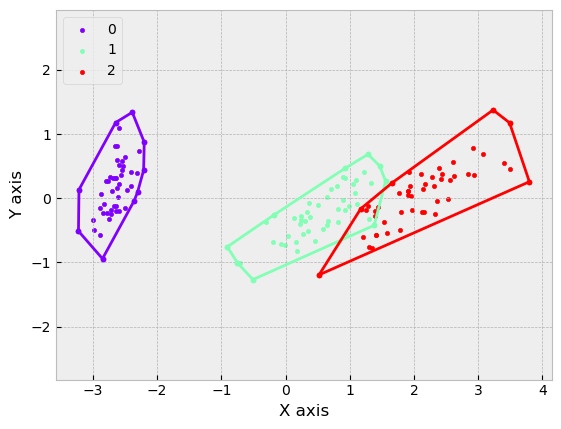

In [17]:
# Dataset test

iris = skdataset.load_iris()
X_iris, Y_iris = iris.data, iris.target

pca = PCA(n_components=2)

pca.fit(X_iris)

iris2D = pca.transform(X_iris)

plotConvexHullDatabases(iris.target, iris2D)

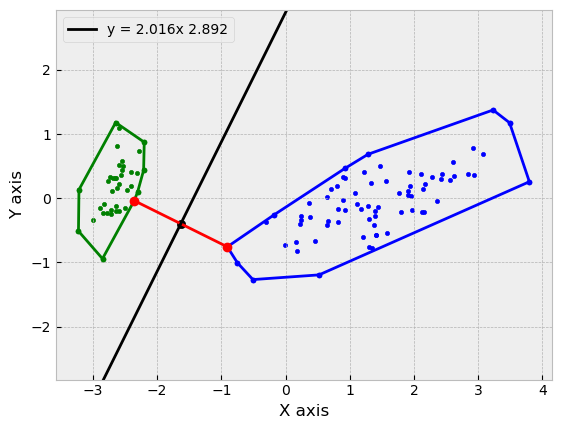

In [42]:

trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(iris2D, iris.target)

slope, intercept, _, _ = generateModelAndPlot(trainingData, trainingDataLabel, targetLabelId=0)

In [19]:
precision, recall, f1 = runModelAndGetMetrics(trainingData, trainingDataLabel, 0, ANTI_CLOCKWISE, slope, intercept)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

TP: 30 FP: 0 TN: 70 FN: 0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


#NÂO É SEPARÁVEL, 54 dimensoes
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html

2

In [20]:
""" covtype = skdataset.fetch_covtype()

X_covtype, Y_covtype = covtype.data, covtype.target

pca = PCA(n_components=2)

pca.fit(X_covtype)

covtype2D = pca.transform(X_covtype)

plotConvexHullDatabases(covtype.target, covtype2D) """

' covtype = skdataset.fetch_covtype()\n\nX_covtype, Y_covtype = covtype.data, covtype.target\n\npca = PCA(n_components=2)\n\npca.fit(X_covtype)\n\ncovtype2D = pca.transform(X_covtype)\n\nplotConvexHullDatabases(covtype.target, covtype2D) '

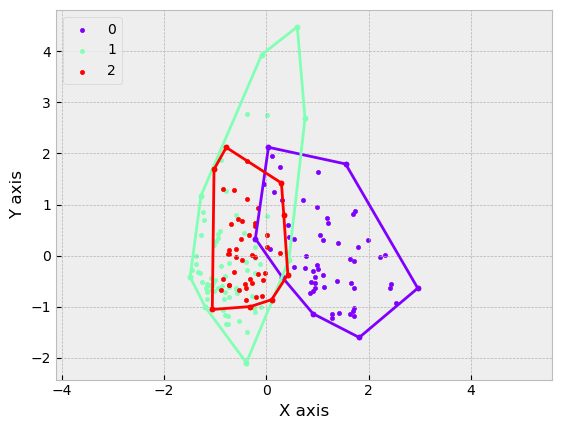

In [77]:
wine = skdataset.load_wine()

X_wine, Y_wine = wine.data, wine.target

pca = PCA(n_components=2, whiten=True)

pca.fit(X_wine)

wine2D = pca.transform(X_wine)

wineTarget = wine.target

plotConvexHullDatabases(wineTarget, wine2D)

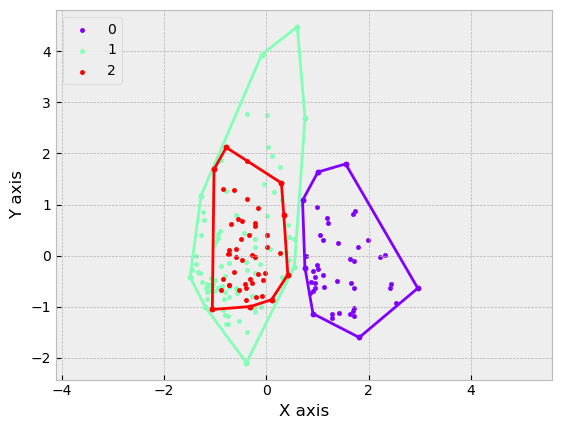

In [83]:
wineTargetFilter = cp.deepcopy(wineTarget)

for i in range(wine2D.shape[0]):
    if wine2D[i][0] < (0.7) and wineTarget[i] == 0:
        wineTargetFilter[i] = 1

plotConvexHullDatabases(wineTargetFilter, wine2D)

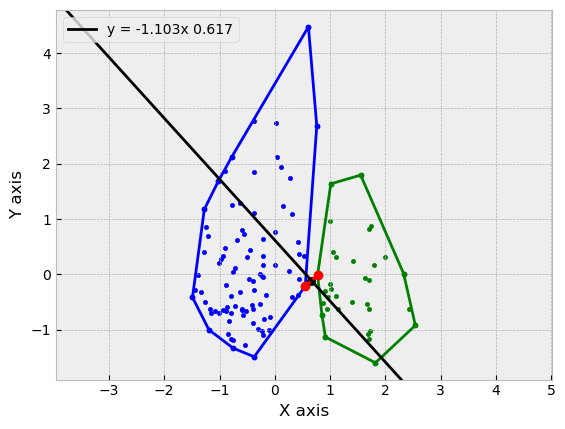

In [92]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(wine2D, wineTargetFilter)

targetToBeSeparated = 0

slope, intercept, _,  _ = generateModelAndPlot(trainingData, trainingDataLabel, targetLabelId=targetToBeSeparated)

In [93]:
precision, recall, f1 = runModelAndGetMetrics(trainingData, trainingDataLabel, targetToBeSeparated, CLOCKWISE, slope, intercept)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

TP: 5 FP: 73 TN: 17 FN: 28
Precision: 0.0641025641025641
Recall: 0.15151515151515152
F1-Score: 0.09009009009009009


3

In [22]:
df = pd.read_csv("datasets/ecoli.csv")

df.head()

,Mcg,Gvh,Lip,Chg,Aac,Alm1,Alm2,Site
0,49.0,29.0,48.0,5.0,56.0,24.0,35.0,cp
1,7.0,4.0,48.0,5.0,54.0,35.0,44.0,cp
2,56.0,4.0,48.0,5.0,49.0,37.0,46.0,cp
3,59.0,49.0,48.0,5.0,52.0,45.0,36.0,cp
4,23.0,32.0,48.0,5.0,55.0,25.0,35.0,cp


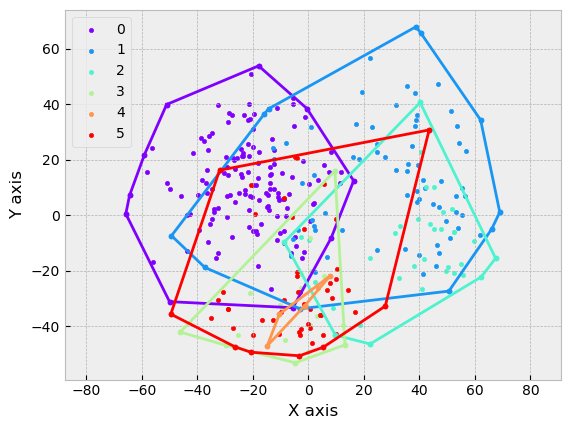

In [23]:
# Generate numeric target labels from Site column
testTarget = getNumericTargetFromDataframe(df['Site'])

# Drop non-numeric
df.drop(columns=['Site'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

test2D = pca.transform(df)

plotConvexHullDatabases(testTarget, test2D)

4

In [24]:
df = pd.read_csv("datasets/dermatology.prepared.csv")

df.head()

,Erythema,Scaling,Definite_borders,Itching,Koebner_phenomenon,Polygonal_papules,Follicular_papules,Oral_mucosal,Knee_and_elbow,Scalp_involvement,...,Granular_layer,Vacuolisation,Spongiosis,Saw-tooth_appearance,Follicular_horn_plug,Perifollicular_parakeratosis,Inflammatory_monoluclear,Band-like_infiltrate,Age,Class
0,-0.117801,0.275119,-1.744938,1.451510,-0.701834,-0.470847,-0.296029,-0.454293,0.381330,-0.582526,...,-0.545511,-0.480813,1.818459,-0.477957,-0.23352,-0.237885,-1.255960,-0.504915,1.222227,2
1,1.388370,1.702547,1.589694,0.569268,0.400169,-0.470847,-0.296029,-0.454293,0.381330,0.515076,...,-0.545511,-0.480813,-0.842338,-0.477957,-0.23352,-0.237885,-1.255960,-0.504915,-1.849038,1
2,-0.117801,-1.152309,0.478150,1.451510,0.400169,2.670081,-0.296029,3.133288,-0.629901,-0.582526,...,-0.545511,1.605623,1.818459,1.608735,-0.23352,-0.237885,0.175994,2.206480,-0.672809,3
3,-0.117801,0.275119,0.478150,-1.195216,-0.701834,-0.470847,-0.296029,-0.454293,2.403792,1.612678,...,2.900835,-0.480813,-0.842338,-0.477957,-0.23352,-0.237885,1.607949,-0.504915,0.242036,1
4,-0.117801,1.702547,0.478150,0.569268,1.502171,1.623105,-0.296029,1.937428,-0.629901,-0.582526,...,1.752053,2.648840,0.931527,2.652081,-0.23352,-0.237885,0.175994,2.206480,0.568766,3


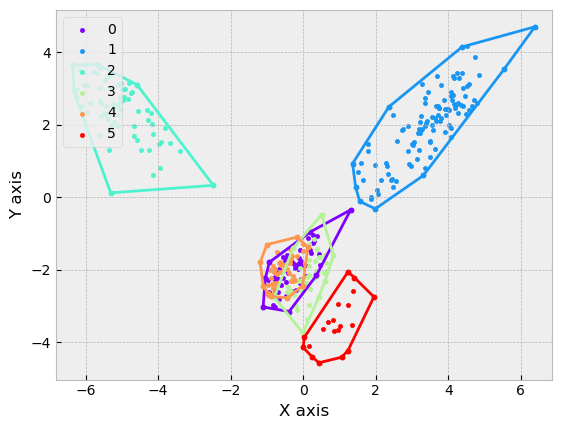

In [25]:
# Generate numeric target labels
dermatologyTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

dermatology2D = pca.transform(df)

plotConvexHullDatabases(dermatologyTarget, dermatology2D)

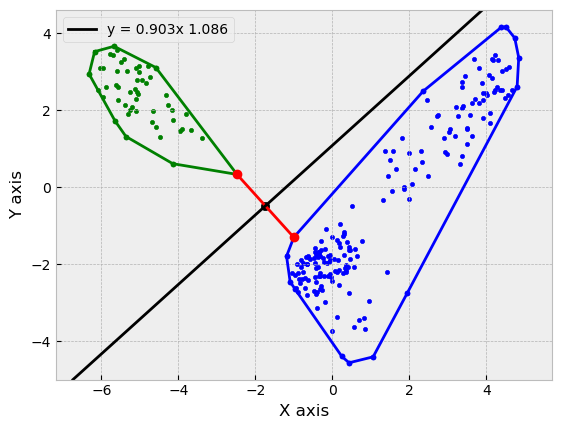

In [94]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(dermatology2D, dermatologyTarget)

targetToBeSeparated = 2

slope, intercept, _,  _ = generateModelAndPlot(trainingData, trainingDataLabel, targetLabelId=targetToBeSeparated)

In [95]:
precision, recall, f1 = runModelAndGetMetrics(trainingData, trainingDataLabel, targetToBeSeparated, ANTI_CLOCKWISE, slope, intercept)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

TP: 54 FP: 0 TN: 189 FN: 0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


5

In [54]:
df = pd.read_csv("datasets/hepatitis.prepared.csv")

df.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology,Class
0,-0.594372,-0.399275,0.951190,0.596601,1.362770,0.795395,0.420084,0.440488,0.951190,0.480384,0.67420,0.420084,0.377964,-0.369369,-0.148318,-0.759300,0.272841,0.536384,-0.837931,2
1,-0.148314,-0.399275,-1.051315,-1.676163,1.362770,0.795395,0.420084,-2.270208,-1.051315,0.480384,0.67420,0.420084,0.377964,0.090546,-0.466979,-0.731191,0.971312,0.965921,-0.837931,2
2,-0.772795,-0.399275,0.951190,-1.676163,-0.733799,0.795395,0.420084,0.440488,-1.051315,0.480384,-1.48324,0.420084,0.377964,-0.254390,-0.823130,2.346767,-0.251013,-0.365643,-0.837931,2
3,0.030109,-0.399275,0.951190,-1.676163,-0.733799,0.795395,0.420084,0.440488,-1.051315,0.480384,0.67420,0.420084,0.377964,-0.369369,-0.410745,-0.309553,0.098223,-0.451551,-0.837931,2
4,-0.951218,-0.399275,0.951190,0.596601,-0.733799,0.795395,0.420084,0.440488,-1.051315,0.480384,0.67420,0.420084,0.377964,1.125354,-0.860620,0.871034,1.844402,0.665245,-0.837931,2


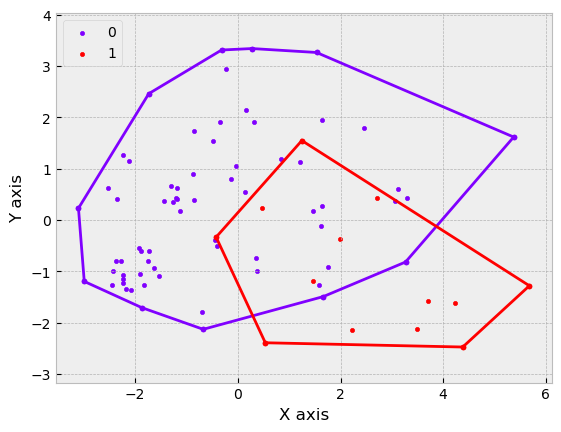

In [55]:
# Generate numeric target labels
hepatitisTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

hepatitis2D = pca.transform(df)

plotConvexHullDatabases(hepatitisTarget, hepatitis2D)

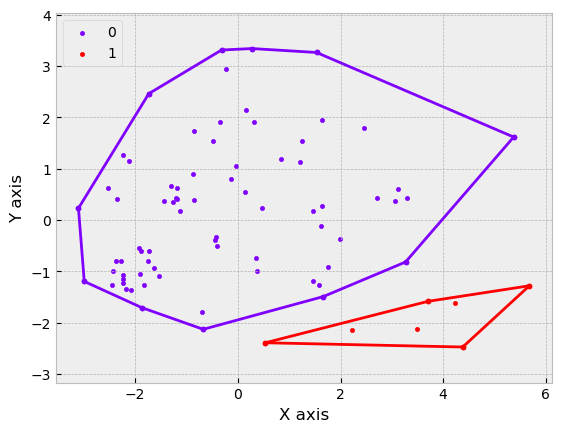

In [56]:
#change points in interception to generate model

hepatitisTargetFilter = cp.deepcopy(hepatitisTarget)

for i in range(hepatitis2D.shape[0]):
    if hepatitis2D[i][1] > (-1.2):
        hepatitisTargetFilter[i] = 0

plotConvexHullDatabases(hepatitisTargetFilter, hepatitis2D)

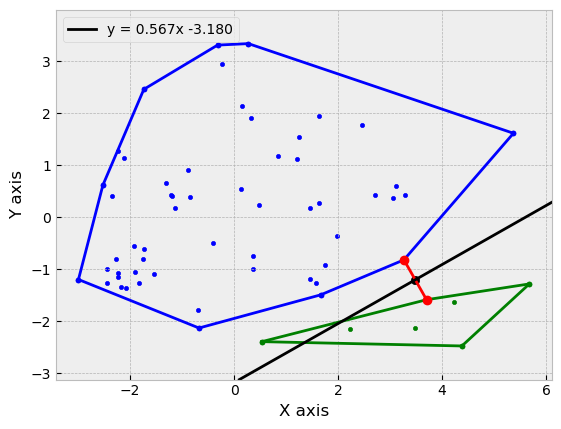

In [74]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(hepatitis2D, hepatitisTargetFilter)

targetToBeSeparated = 1

slope, intercept, _,  _ = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

In [75]:
precision, recall, f1 = runModelAndGetMetrics(trainingData, trainingDataLabel, targetToBeSeparated, CLOCKWISE, slope, intercept)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

TP: 6 FP: 0 TN: 55 FN: 1
Precision: 1.0
Recall: 0.8571428571428571
F1-Score: 0.923076923076923


6

In [113]:
df = pd.read_csv("datasets/monk-2.prepared.csv")

df.head()

,A1,A2,A3,A4,A5,A6,Class
0,-1.224745,-1.224745,-1.0,-1.224745,-1.341641,-1.0,1
1,-1.224745,-1.224745,-1.0,-1.224745,-1.341641,1.0,1
2,-1.224745,-1.224745,-1.0,-1.224745,-0.447214,1.0,1
3,-1.224745,-1.224745,-1.0,-1.224745,0.447214,-1.0,1
4,-1.224745,-1.224745,-1.0,-1.224745,0.447214,1.0,1


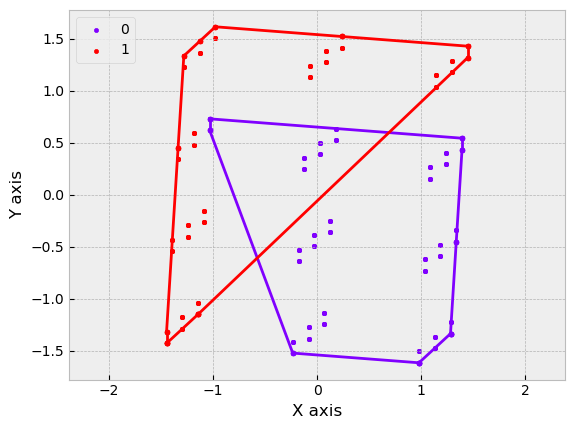

In [114]:
# Generate numeric target labels
bananaTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

banana2D = pca.transform(df)

plotConvexHullDatabases(bananaTarget, banana2D)

7

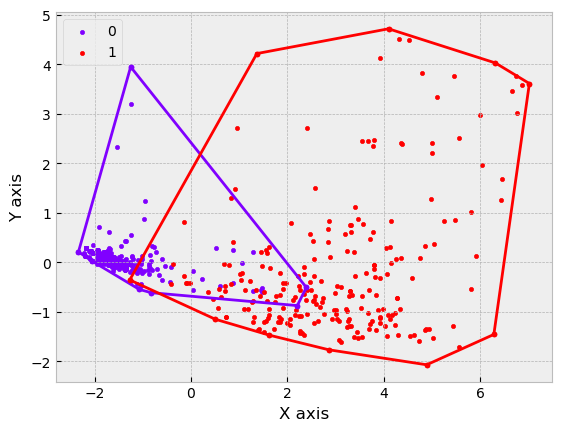

In [125]:
df = pd.read_csv("datasets/wisconsin.prepared.csv")

# Generate numeric target labels
wisconsinTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

wisconsin2D = pca.transform(df)

plotConvexHullDatabases(wisconsinTarget, wisconsin2D, scaleEqual=False)

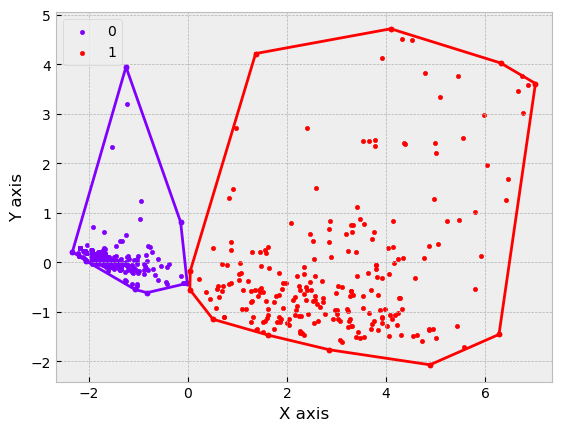

In [126]:
#change points in interception to generate model

wisconsinTargetFilter = cp.deepcopy(wisconsinTarget)

for i in range(wisconsin2D.shape[0]):
    if wisconsin2D[i][0] >= 0:
        wisconsinTargetFilter[i] = 1
    else:
        wisconsinTargetFilter[i] = 0
        

plotConvexHullDatabases(wisconsinTargetFilter, wisconsin2D)

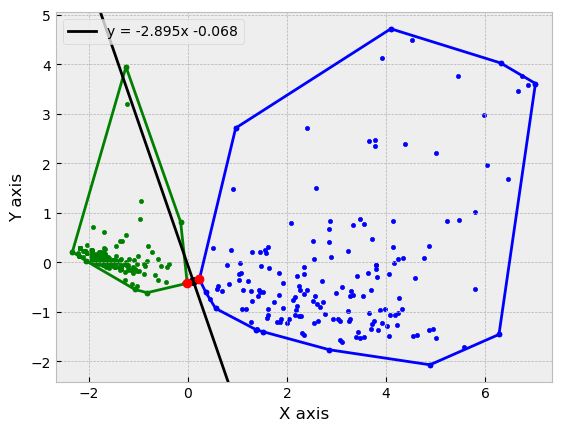

In [134]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(wisconsin2D, wisconsinTargetFilter)

targetToBeSeparated = 0

slope, intercept, _,  _ = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

In [136]:
precision, recall, f1 = runModelAndGetMetrics(trainingData, trainingDataLabel, targetToBeSeparated, CLOCKWISE, slope, intercept)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

TP: 303 FP: 0 TN: 170 FN: 2
Precision: 1.0
Recall: 0.9934426229508196
F1-Score: 0.9967105263157894


8

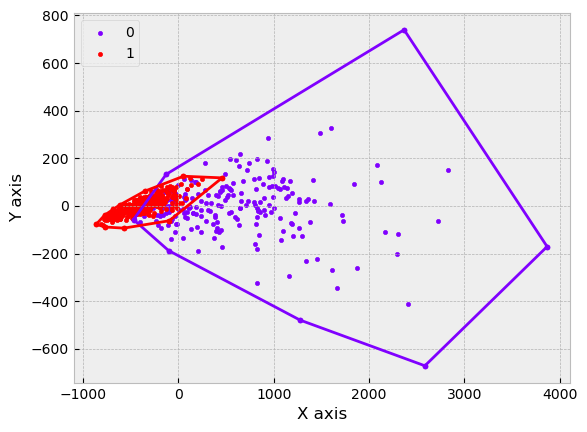

In [146]:
breastCancer = skdataset.load_breast_cancer()
X_breastCancer, breastCancerTarget = breastCancer.data, breastCancer.target

pca = PCA(n_components=2)

pca.fit(X_breastCancer)

breastCancer2D = pca.transform(X_breastCancer)

plotConvexHullDatabases(breastCancer.target, breastCancer2D, scaleEqual= False)

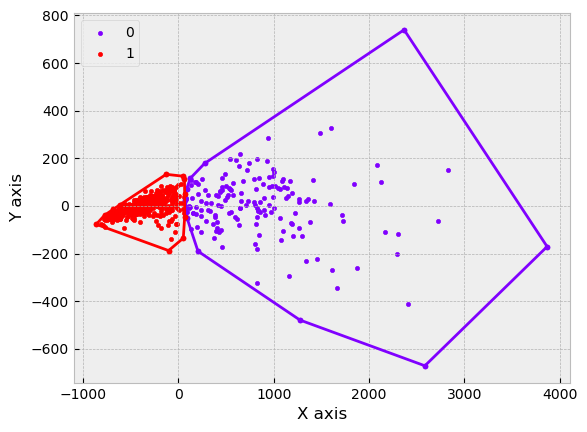

In [148]:
#change points in interception to generate model

breastCancerTargetFilter = cp.deepcopy(breastCancerTarget)

for i in range(breastCancer2D.shape[0]):
    if breastCancer2D[i][0] <= 70:
        breastCancerTargetFilter[i] = 1
    else:
        breastCancerTargetFilter[i] = 0
        

plotConvexHullDatabases(breastCancerTargetFilter, breastCancer2D, scaleEqual=False)

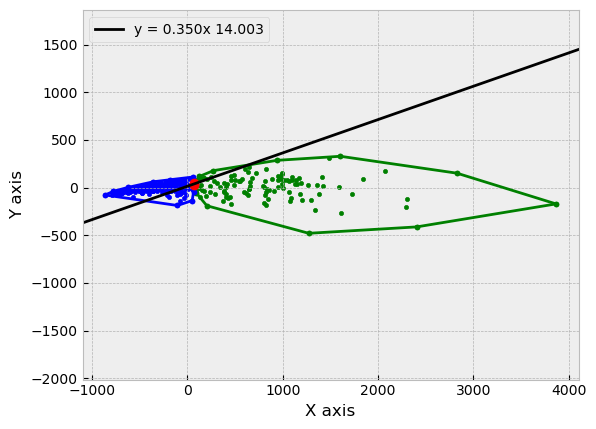

In [152]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(breastCancer2D, breastCancerTargetFilter)

targetToBeSeparated = 0

slope, intercept, _,  _ = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

In [153]:
precision, recall, f1 = runModelAndGetMetrics(trainingData, trainingDataLabel, targetToBeSeparated, CLOCKWISE, slope, intercept)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

TP: 108 FP: 24 TN: 273 FN: 9
Precision: 0.8181818181818182
Recall: 0.9230769230769231
F1-Score: 0.8674698795180724
